In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# importing the dataset
df = pd.read_csv('/dataset/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# finding out no of rows and column
df.shape

(400, 5)

In [ ]:
# selecting particular columns
X = df.iloc[:, [2, 3]]
Y = df.iloc[:, 4]

In [ ]:
# prints first 5 rows
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
# Splitting the dataset as training set and test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# printing no of rows and columns in testing and training data
print("Training data :",X_Train.shape)
print("Testing data :",X_Test.shape)

Training data : (300, 2)
Testing data : (100, 2)


In [ ]:
# feature scaling to standardize the range of independent varriables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
# Usage of SVM especially the Linear Kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [ ]:
# printing the predicted labels generated by SVM classifier
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# calculating the accuracy score of the SVM classifier
from sklearn import metrics
print("Accuracy Score: with Linear kernel")

print(metrics.accuracy_score(Y_Test, Y_Pred))

Accuracy Score: with Linear kernel
0.79


In [ ]:
# calculating the accuracy of the SVM classsifier for Radial Basis Function kernel

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_Train, Y_Train)

# predicting the test set results
Y_Pred = classifier.predict(X_Test)

print("Accuracy Score: with RBF kernel")

print(metrics.accuracy_score(Y_Test, Y_Pred))

Accuracy Score: with RBF kernel
0.93


In [ ]:

from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", gamma= 15 , C=7, random_state = 0)
classifier.fit(X_Train, Y_Train)

# predicting the test set results
Y_Pred = classifier.predict(X_Test)

print("Accuracy Score: with RBF kernel")

print(metrics.accuracy_score(Y_Test, Y_Pred))

Accuracy Score: with RBF kernel
0.89


In [ ]:
# calculating the accuracy of the SVM classsifier for Polynomial kernel

from sklearn.svm import SVC
classifier=SVC(kernel='poly',random_state=0)
classifier.fit(X_Train,Y_Train)

# predicting the test set results
Y_Pred=classifier.predict(X_Test)

print("Accuracy Score: with polynomial kernel")

print(metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy Score: with polynomial kernel
0.86


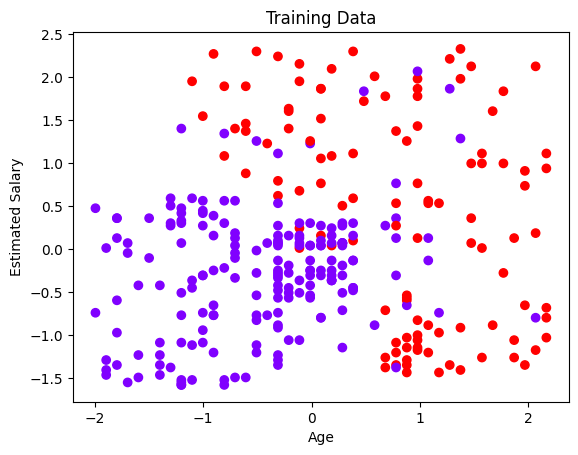

In [ ]:
# Visualizing the scatter plot of training data points
plt.scatter(X_Train[:, 0], X_Train[:, 1], c = Y_Train , cmap = 'rainbow')
plt.title('Training Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

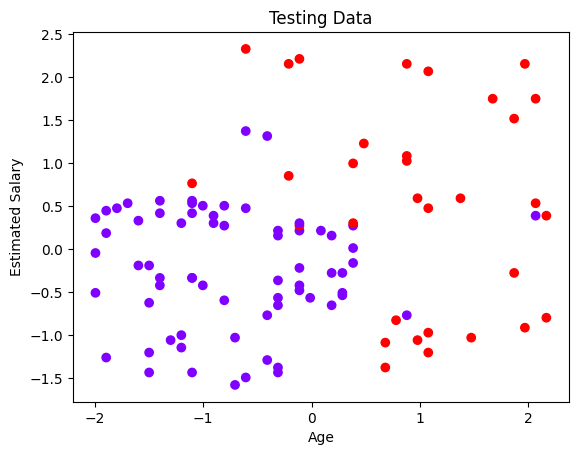

In [ ]:
# Visualizing the scatter plot of testing data points
plt.scatter(X_Test[:, 0], X_Test[:, 1], c = Y_Test , cmap = 'rainbow')
plt.title('Testing Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

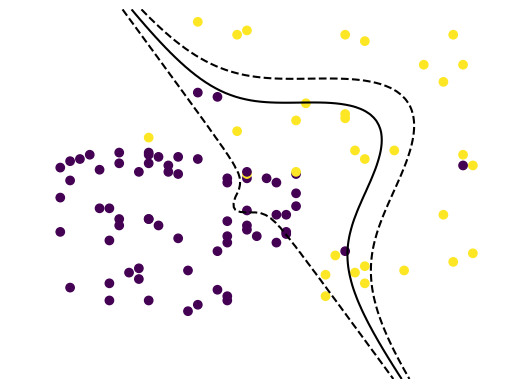

In [ ]:
# 2d hyperplane

# Plotting the test data points
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test)

# Define a meshgrid of points to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 100), np.linspace(-2.5, 2.5, 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Compute the decision function values for each point in the meshgrid
Z = classifier.decision_function(xy).reshape(xx.shape)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

plt.axis("off")
plt.show()

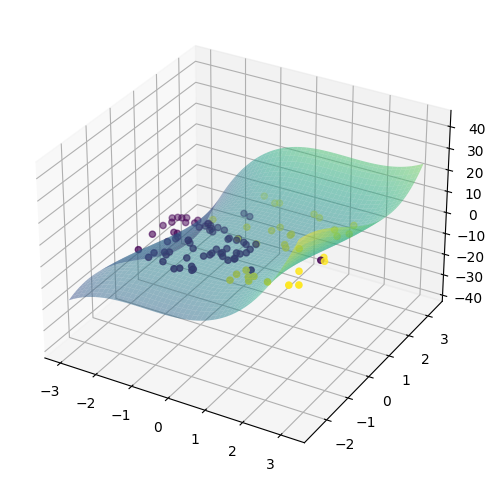

In [ ]:
# 3d hyperplane

# Create a 3D scatter plot of the test data points
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test)

# Define a meshgrid of points to evaluate the decision function
x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Compute the decision function values for each point in the meshgrid
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = classifier.decision_function(xy).reshape(xx.shape)

# Plot the decision boundary as a surface
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap='viridis')

plt.show()


In [ ]:
# # Create a 3D scatter plot of the test data points
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test)

# # Define a meshgrid of points to evaluate the decision function
# x_min, x_max = X_Test[:, 0].min() - 1, X_Test[:, 0].max() + 1
# y_min, y_max = X_Test[:, 1].min() - 1, X_Test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                      np.linspace(y_min, y_max, 100))

# # Compute the decision function values for each point in the meshgrid
# xy = np.vstack([xx.ravel(), yy.ravel()]).T
# Z = classifier.decision_function(xy).reshape(xx.shape)

# # Plot the decision boundary with a different colormap
# ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.8)

# plt.show()
